In [61]:
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
dat = pd.read_excel("APT_data-info-dictionary_final.xlsx")

In [68]:
dat

,Region,Country,Indicator,Input,Date,Unnamed: 5
0,Americas,Antigua and Barbuda,Ratification of the UN Convention against Torture,Yes,1993-01-01,NaN
1,Americas,Argentina,Ratification of the UN Convention against Torture,Yes,1986-01-01,NaN
2,Americas,Bahamas,Ratification of the UN Convention against Torture,Yes,2018-01-01,NaN
3,Americas,Barbados,Ratification of the UN Convention against Torture,No,NaT,NaN
4,Americas,Belize,Ratification of the UN Convention against Torture,Yes,1986-01-01,NaN
...,...,...,...,...,...,...
1563,Asia-Pacific,Turkmenistan,Existence of National Human Rights Institution...,No,NaT,NaN
1564,Asia-Pacific,Tuvalu,Existence of National Human Rights Institution...,No,NaT,NaN
1565,Asia-Pacific,Uzbekistan,Existence of National Human Rights Institution...,No,NaT,NaN
1566,Asia-Pacific,Vanuatu,Existence of National Human Rights Institution...,No,NaT,NaN


In [73]:
dat['Region'].unique()

array(['Americas', 'Africa', 'Europe', 'Middle East', 'Asia-Pacific'],
      dtype=object)

In [70]:
# Create a DataFrame with all countries
all_countries = dat['Country'].unique()

# Get the ranking in terms of number of acceptance and latest date of acceptance
# Create a new DataFrame to hold rankings
ranking_df = pd.DataFrame({'Country': all_countries})

# Calculate the number of 'Yes' and 'Partially' inputs and the latest date for each country
ranking_df = ranking_df.merge(dat.groupby('Country').agg(
    yes_count=('Input', lambda x: (x == 'Yes').sum()),      # Count 'Yes' indicators
    partially_count=('Input', lambda x: (x == 'Partially').sum()), # Count 'Partially' indicators
    latest_date=('Date', 'max')             # Get the latest date
).reset_index(), on='Country', how='left')

# Fill NaN values with 0 for counts and a default date for ranking
ranking_df['yes_count'].fillna(0, inplace=True)
ranking_df['partially_count'].fillna(0, inplace=True)
ranking_df['latest_date'].fillna(pd.Timestamp('1970-01-01'), inplace=True)  # Use a default old date

# Sort by the number of 'Yes', then by 'Partially', then by latest date (descending)
ranking_df = ranking_df.sort_values(by=['yes_count', 'partially_count', 'latest_date'], ascending=[False, False, False])

# Create a ranking column based on the sorted data
ranking_df['rank'] = ranking_df.reset_index().index + 1

# Merge the ranking back to the original DataFrame (optional)
dat = dat.merge(ranking_df[['Country', 'rank']], on='Country', how='left')

# Print the final dataframe with rankings
print(dat)


            Region              Country  \
0         Americas  Antigua and Barbuda   
1         Americas            Argentina   
2         Americas              Bahamas   
3         Americas             Barbados   
4         Americas               Belize   
...            ...                  ...   
1563  Asia-Pacific         Turkmenistan   
1564  Asia-Pacific               Tuvalu   
1565  Asia-Pacific           Uzbekistan   
1566  Asia-Pacific              Vanuatu   
1567  Asia-Pacific             Viet Nam   

                                              Indicator Input       Date  \
0     Ratification of the UN Convention against Torture   Yes 1993-01-01   
1     Ratification of the UN Convention against Torture   Yes 1986-01-01   
2     Ratification of the UN Convention against Torture   Yes 2018-01-01   
3     Ratification of the UN Convention against Torture    No        NaT   
4     Ratification of the UN Convention against Torture   Yes 1986-01-01   
...                        

/tmp/ipykernel_19421/716358869.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ranking_df['yes_count'].fillna(0, inplace=True)
/tmp/ipykernel_19421/716358869.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [72]:
dat.to_csv("APT_data.csv")

In [76]:
# dat[dat['Country'].str.startswith('T')]
dat[dat['Country'] == "Kazakhstan"]

,Region,Country,Indicator,Input,Date,Unnamed: 5,rank
165,Asia-Pacific,Kazakhstan,Ratification of the UN Convention against Torture,Yes,1998-01-01,NaN,65
361,Asia-Pacific,Kazakhstan,Ratification of Optional Protocol (OPCAT),Yes,2008-01-01,NaN,65
557,Asia-Pacific,Kazakhstan,Submission of initial report to CAT,Yes,2000-01-01,NaN,65
753,Asia-Pacific,Kazakhstan,Prohibition of torture in the constitution,Yes,1995-01-01,NaN,65
949,Asia-Pacific,Kazakhstan,Criminalisation of torture under domestic law,Partially,2023-01-01,NaN,65
1145,Asia-Pacific,Kazakhstan,Designation of the National Preventive Mechani...,Yes,2013-01-01,NaN,65
1341,Asia-Pacific,Kazakhstan,Operationality of the National Preventive Mech...,NaN,2014-01-01,NaN,65
1537,Asia-Pacific,Kazakhstan,Existence of National Human Rights Institution...,No,NaT,NaN,65


In [32]:
valid_dates = dat[dat['Date'].notna()]

In [36]:
# Group by the 'category' column and get the most frequent dates for each category
grouped = valid_dates.groupby('Indicator')['Date']

# Loop through each group and print the top 5 dates
for name, group in grouped:
    top_dates = group.value_counts().head(5)  # Get top 5 dates for each category
    print(f"Top dates for category {name}:")
    print(top_dates, '\n')

Top dates for category Criminalisation of torture under domestic law:
Date
1984-01-01    9
2009-01-01    8
2018-01-01    7
2008-01-01    7
2019-01-01    6
Name: count, dtype: int64 

Top dates for category Designation of the National Preventive Mechanism (in law) :
Date
2009-01-01    9
2007-01-01    9
2013-01-01    7
2012-01-01    7
2018-01-01    7
Name: count, dtype: int64 

Top dates for category Existence of National Human Rights Institution that fully complies with Paris Principles:
Date
1999-01-01    15
2000-01-01     7
2022-01-01     5
2003-01-01     5
2001-01-01     5
Name: count, dtype: int64 

Top dates for category Operationality of the National Preventive Mechanism :
Date
2012-01-01    9
2014-01-01    8
2018-01-01    7
2009-01-01    7
2016-01-01    6
Name: count, dtype: int64 

Top dates for category Prohibition of torture in the constitution :
Date
1984-01-01    20
1991-01-01    10
1992-01-01     9
1996-01-01     8
1995-01-01     8
Name: count, dtype: int64 

Top dates for 

In [81]:
from collections import Counter

data=dat

# Filter to include only approved indicators and sort by country and date
data = data[(data['Input'] == "Yes") & (data['Date'].notna())]
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values(by=['Country', 'Date'])

# Group data by Country and collect ordered indicators for each country
indicator_sequences = data.groupby('Country')['Indicator'].apply(list)

# Count the frequency of each unique sequence
sequence_counts = Counter(tuple(seq) for seq in indicator_sequences)

# Convert to DataFrame for easier viewing
sequence_df = pd.DataFrame(sequence_counts.items(), columns=['Indicator_Sequence', 'Frequency'])
sequence_df = sequence_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

print(sequence_df)


                                    Indicator_Sequence  Frequency
0    (Prohibition of torture in the constitution , ...         12
1       (Prohibition of torture in the constitution ,)         11
2    (Prohibition of torture in the constitution , ...         10
3    (Ratification of the UN Convention against Tor...          7
4    (Ratification of the UN Convention against Tor...          6
..                                                 ...        ...
107  (Ratification of the UN Convention against Tor...          1
108  (Ratification of the UN Convention against Tor...          1
109  (Ratification of the UN Convention against Tor...          1
110  (Ratification of the UN Convention against Tor...          1
111  (Ratification of the UN Convention against Tor...          1

[112 rows x 2 columns]


/tmp/ipykernel_19421/2010862287.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'])


In [88]:
import itertools
from collections import Counter

# Sample data
data = list(sequence_df['Indicator_Sequence'])

# Initialize counters
pairs_counter = Counter()
triples_counter = Counter()
quads_counter = Counter()
fifths_count = Counter()

# Loop through each ordering and extract pairs and triples
for order in data:
    pairs = list(itertools.combinations(order, 2))
    triples = list(itertools.combinations(order, 3))
    quads = list(itertools.combinations(order,4))
    fifths = list(itertools.combinations(order,5))
    sixths = list(itertools.combinations(order,6))
    sevenths = list(itertools.combinations(order,7))
    eighths = list(itertools.combinations(order,8))
    
    # Count pairs and triples
    pairs_counter.update(pairs)
    triples_counter.update(triples)

# Output most common pairs and triples
print("Most common pairs:")
for pair, count in pairs_counter.most_common(5):  # Show top 5 most common
    print(f"{pair}: {count}")

print("\nMost common triples:")
for triple, count in triples_counter.most_common(5):  # Show top 5 most common
    print(f"{triple}: {count}")


Most common pairs:
('Ratification of the UN Convention against Torture', 'Submission of initial report to CAT '): 87
('Ratification of the UN Convention against Torture', 'Ratification of Optional Protocol (OPCAT)'): 74
('Ratification of the UN Convention against Torture', 'Designation of the National Preventive Mechanism (in law) '): 64
('Submission of initial report to CAT ', 'Designation of the National Preventive Mechanism (in law) '): 59
('Submission of initial report to CAT ', 'Ratification of Optional Protocol (OPCAT)'): 57

Most common triples:
('Ratification of the UN Convention against Torture', 'Submission of initial report to CAT ', 'Designation of the National Preventive Mechanism (in law) '): 55
('Ratification of the UN Convention against Torture', 'Ratification of Optional Protocol (OPCAT)', 'Designation of the National Preventive Mechanism (in law) '): 55
('Ratification of the UN Convention against Torture', 'Submission of initial report to CAT ', 'Ratification of Optio

(array([19.,  8.,  6.,  1.,  4.,  8.,  4.,  1.,  1.,  1.]),
 array([ 1. ,  9.6, 18.2, 26.8, 35.4, 44. , 52.6, 61.2, 69.8, 78.4, 87. ]),
 <BarContainer object of 10 artists>)

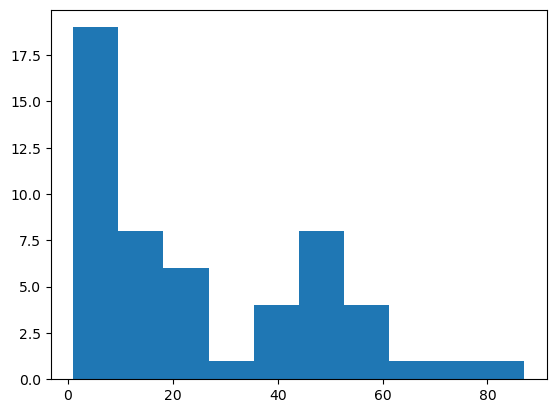

In [86]:
plt.hist(pairs_counter.values())

(array([132.,  30.,  14.,  12.,   9.,   3.,   3.,   5.,   2.,   3.]),
 array([ 1. ,  6.4, 11.8, 17.2, 22.6, 28. , 33.4, 38.8, 44.2, 49.6, 55. ]),
 <BarContainer object of 10 artists>)

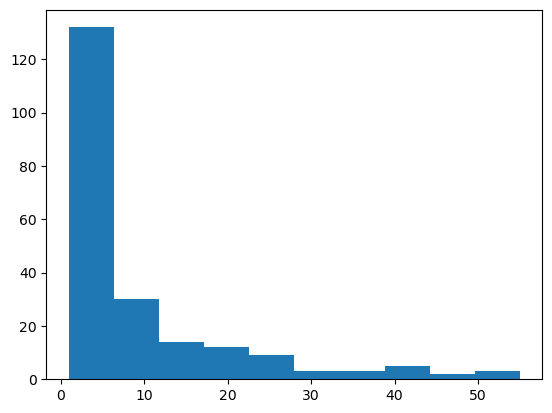

In [87]:
plt.hist(triples_counter.values())